In [35]:
! pip install statsmodels
! pip install scipy
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use ('ggplot')

In [36]:
df = pd.read_csv ('C:/benzimidazoles/data-benzimidazoles.csv', sep=';')

In [37]:
df=df.set_index('molecules')
#df=df.drop(['Unnamed: 13'],axis=1)
df.head(n=3)

,ENERGY,HOMO,LUMO,u,GapEnergy,ENegativity,Hardness,EPhylicity,ETransfert,BendEnergy,logP,MolecularArea,ExtractMass,HeatFormation,MolarRefractivity,MolecularWeight,EnthalpyEnergy,TotalEnergy,IEexp
molecules,,,,,,,,,,,,,,,,,,,
benzimidazole1,"-379,9922251","-6,471190596","-0,856349052","5,3916","5,614841544","3,663769824","2,807420772","0,298833218","0,148932106","20,0248","1,0594","121,002","118,053","206,01","3,7124","118,139","354,72","48,6566","52,76"
benzimidazole2,"-839,6123236","-6,56343792","-0,949412724","5,2017","5,614025196","3,756425322","2,807012598","0,314184803","0,132449473","19,1304","1,771","137,976","152,014","169,93","4,2038","152,584","335,08","40,5897","52,8"
benzimidazole3,"-455,2514963","-6,184380332","-0,579062848","7,5201","5,605317484","3,38172159","2,802658742","0,25502661","0,199503135","22,952","1,0347","127,042","134,048","33,44","3,8655","134,138","210,19","45,8445","68,95"


In [38]:
#Convert string to float variables
data=df.copy()

for column in data.columns:
    data[column] =data[column].apply(lambda x: x.replace(',', '.'))
    data[column]=data[column].astype('float')

In [39]:

#Calculation multicolinearity VIF


def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
x=data.copy().drop(['IEexp'],axis=1)    
y=data['IEexp'].values



vifMatrix=calc_vif(x)
print(vifMatrix)

            variables           VIF
0              ENERGY  6.560305e+02
1                HOMO           inf
2                LUMO           inf
3                   u  1.149011e+02
4           GapEnergy           inf
5         ENegativity           inf
6            Hardness           inf
7          EPhylicity  8.436050e+03
8          ETransfert  3.340440e+00
9          BendEnergy  1.035194e+03
10               logP  5.641774e+01
11      MolecularArea  8.218224e+04
12        ExtractMass  3.501218e+07
13      HeatFormation  7.889752e+03
14  MolarRefractivity  1.455360e+05
15    MolecularWeight  3.298209e+07
16     EnthalpyEnergy  2.313663e+04
17        TotalEnergy  3.872040e+02


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [40]:
#Calculation of correlation matrix based on R - pearson between [-1,1]

def calc_r_pearson(X,y):


    r = pd.DataFrame()
    r["variables"] = X.columns
    r["RCoef"]=[pearsonr(X[column].values, y)[0] for column in X.columns] 
    r["p_value"]=[pearsonr(X[column].values, y)[1] for column in X.columns]
    
    return(r)


rMatrix=calc_r_pearson(x,y)
print(rMatrix)

            variables     RCoef   p_value
0              ENERGY -0.091973  0.699756
1                HOMO  0.258902  0.270367
2                LUMO  0.191770  0.417965
3                   u -0.138829  0.559406
4           GapEnergy -0.216141  0.360058
5         ENegativity -0.266809  0.255479
6            Hardness -0.216141  0.360058
7          EPhylicity -0.239703  0.308725
8          ETransfert  0.152122  0.522011
9          BendEnergy  0.203221  0.390158
10               logP  0.183441  0.438841
11      MolecularArea  0.121658  0.609391
12        ExtractMass  0.114232  0.631552
13      HeatFormation  0.216557  0.359110
14  MolarRefractivity  0.171899  0.468649
15    MolecularWeight  0.115341  0.628223
16     EnthalpyEnergy  0.220319  0.350616
17        TotalEnergy  0.277885  0.235518


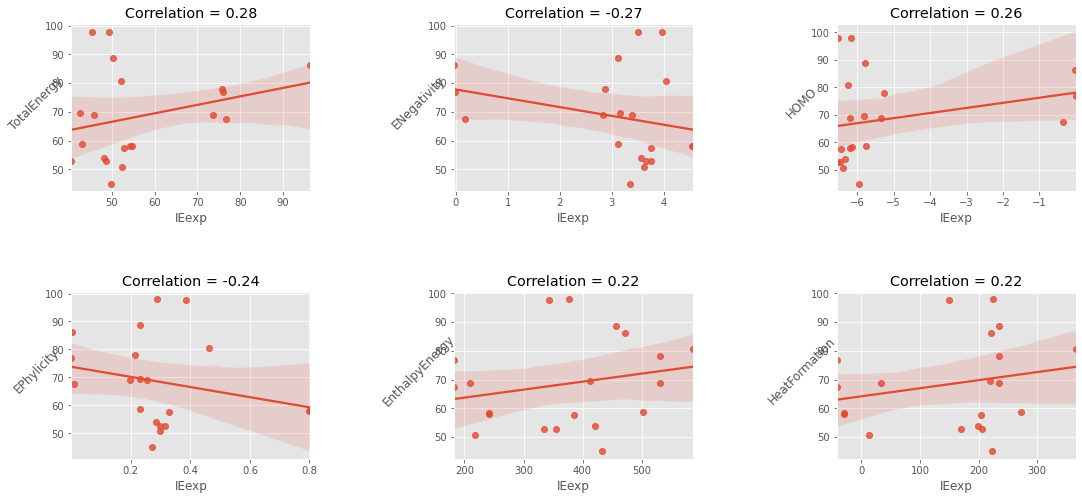

In [41]:
#Here just we will create a scatter plot for best 6 variables the most correlated to IEsxp based on p_value
rMatrix6=rMatrix.sort_values(by='p_value', axis=0, ascending=True)[:6]







fig = plt.figure(figsize=(18,8))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
for i,column in zip(range(1,7),rMatrix6['variables'].tolist()):
    ax = fig.add_subplot(2, 3, i)
    ax  = sns.regplot(x=column, y="IEexp", data=data)
    ax.title.set_text('Correlation = ' + "{:.2f}".format(rMatrix6 [rMatrix6['variables']==column]['RCoef'].tolist()[0]))
    ax.set_xlabel("IEexp", rotation=0)
    ax.set_ylabel(column, rotation=45)

In [42]:
df1=df.drop(['ENERGY','LUMO','u', 'GapEnergy', 'Hardness', 'ETransfert', 'BendEnergy', 'logP', 'MolecularArea', 'ExtractMass','MolarRefractivity', 'MolecularWeight', 'IEexp'], axis=1)


df1.head

<bound method NDFrame.head of                          HOMO   ENegativity   EPhylicity HeatFormation  \
molecules                                                                
benzimidazole1   -6,471190596   3,663769824  0,298833218        206,01   
benzimidazole2    -6,56343792   3,756425322  0,314184803        169,93   
benzimidazole3   -6,184380332    3,38172159   0,25502661         33,44   
benzimidazole4     -5,8096766   3,146069134   0,23224497        219,46   
benzimidazole5   -6,165876444   3,499139644  0,286960693        224,15   
benzimidazole6    -6,52534168   3,969628208  0,385360788        149,29   
benzimidazole7    -6,39200484   3,625401468  0,296924017          12,8   
benzimidazole8    -6,32805758   3,557100352  0,285392418        198,82   
benzimidazole9   -6,440441488   3,752071466  0,327290332        203,51   
benzimidazole10   -6,25322568   4,043099528  0,462265858        365,68   
benzimidazole11  -5,778927492   3,124299854  0,229816826         234,7   
benzimid

In [43]:
#Standarazing and scaling data




prepData = StandardScaler (with_mean=True, with_std=True).fit_transform(x)

In [44]:
#Implementing 4 models of regression : SVMregression , Linear Regression,Gradient Boosting , RandomForest :

svmREG=SVR(kernel='rbf',C=1)
linearREG=LinearRegression(fit_intercept=True)
gbtREG= GradientBoostingRegressor ()   
rfREG = RandomForestRegressor()

In [45]:
#calculating RMSE for the 4 models
svmRMSE=(cross_val_score(svmREG,x,y,cv=5,scoring='neg_root_mean_squared_error')*-1).mean()    
linearRMSE=(cross_val_score(linearREG,x,y,cv=5,scoring='neg_root_mean_squared_error')*-1).mean() 
gbtRMSE = (cross_val_score(gbtREG,x,y,cv=5,scoring='neg_root_mean_squared_error')*-1).mean()
rfRMSE=(cross_val_score(rfREG,x,y,cv=5,scoring='neg_root_mean_squared_error')*-1).mean()   
print(svmRMSE,linearRMSE,gbtRMSE,rfRMSE)


14.61593181352022 29012.95031034156 22.340993905141282 17.959738554716317


In [46]:

#calculating R2 for the two models

svmSCE=np.absolute(cross_val_score(svmREG,x,y,cv=5,scoring='explained_variance')).mean()    
svmSCT=np.absolute(cross_val_score(svmREG,x,y,cv=5,scoring='r2')).mean()    
svmR2=np.round(svmSCE/svmSCT,2)

print(svmR2)

linearSCE=np.absolute(cross_val_score(linearREG,x,y,cv=5,scoring='explained_variance')).mean()    
linearSCT=np.absolute(cross_val_score(linearREG,x,y,cv=5,scoring='r2')).mean()    
linearR2=np.round(linearSCE/linearSCT,2)
print(linearR2)


gbtSCE = np.absolute(cross_val_score(gbtREG,x,y,cv=5,scoring='explained_variance')).mean()    
gbtSCT = np.absolute(cross_val_score(gbtREG,x,y,cv=5,scoring='r2')).mean()    
gbtR2=np.round(gbtSCE/gbtSCT,2)
print(gbtR2)



regrSCE=np.absolute(cross_val_score(rfREG,x,y,cv=5,scoring='explained_variance')).mean()    
regrSCT=np.absolute(cross_val_score(rfREG,x,y,cv=5,scoring='r2')).mean()    
regrR2=np.round(regrSCE/regrSCT,2)
print(regrR2)

0.08
0.71
0.86
0.82
